In [59]:
import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt

!mkdir -p ../figures

In [5]:
rxn_df = pd.read_excel('../data/jinich2018_dataset_S1.xlsx')
rxn_df.columns = ['redox_pair_names', 'KEGG_ID', 'category', 'Em_quantum_pH7_I25',
       'Em_GCM_pH7_I25', 'Em_experiment_pH7_I25', 'KEGG',
       'Unnamed: 7', 'Unnamed: 8']

In [72]:
mask = np.logical_not(np.isnan(rxn_df['Em_experiment_pH7_I25']))
mask = np.logical_and(mask, rxn_df['category'] != 3)
rxns_w_exp_data_df = rxn_df[mask]
rxns_w_exp_data_df.head(3)

,redox_pair_names,KEGG_ID,category,Em_quantum_pH7_I25,Em_GCM_pH7_I25,Em_experiment_pH7_I25,KEGG,Unnamed: 7,Unnamed: 8
0,Formate = Formaldehyde,C00058 = C00067 + C00001,1,-569.535139,NaN,-559.245286,NaN,Column,Description
5,Oxalate = Glyoxylate,C00209 = C00048 + C00001,1,-562.111149,-544.474061,-460.047533,NaN,NaN,NaN
7,Acetate = Acetaldehyde,C00033 = C00084 + C00001,1,-548.220682,-536.101106,-579.879311,NaN,NaN,NaN


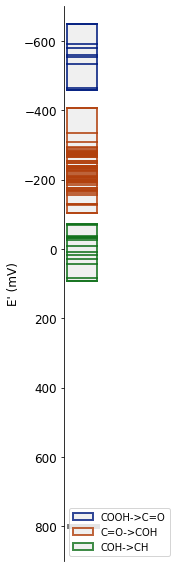

In [75]:
plt.figure(figsize=(2,8))
plt.gca().invert_yaxis()
groups = rxns_w_exp_data_df.groupby('category')
pal = sns.color_palette('dark')
greys = sns.color_palette('Greys')

labels = 'COOH->C=O,C=O->COH,COH->CH'.split(',')

for i, (gid, gdf) in enumerate(groups):
        
    bottom = gdf['Em_experiment_pH7_I25'].min()
    top = gdf['Em_experiment_pH7_I25'].max()
    
    l = labels[i]
    plt.axhspan(bottom, top, 0.05, 0.5, edgecolor=pal[i],
                facecolor=greys[0], lw=2, label=l, alpha=0.8)
    
    for idx, row in gdf.iterrows():
        plt.axhline(row['Em_experiment_pH7_I25'], 
                    0.05, 0.5, color=pal[i],
                    lw=2, alpha=0.8)
    
plt.axhline(800, 0.08, 0.5, color='grey', lw=5)

plt.legend(loc='best')
sns.despine(bottom=True)
plt.xticks([])
plt.yticks(fontsize=12)
plt.ylabel("E' (mV)", fontsize=12)
plt.ylim(900, -700)

plt.tight_layout()
plt.savefig('../figures/richer.png', facecolor='w', dpi=600)
plt.show()